# Julia part of Diabetes Wrangling Project Part 2

Loading all the required libraries

In [1]:
using Queryverse

In [2]:
using DataFrames

In [3]:
using VegaLite

In [4]:
using StatPlots

In [5]:
using PyPlot

In [6]:
using CSV

In [7]:
using Gadfly

Lets read the diabetes_population.csv file which we exported in Jupyterlab. Please take care to run this Julia notebook from the same folder where we exported the csv files

In [8]:
#Reading the first csv file
country_diabetes_2017 = CSV.read("diabetes_population.csv") 

262×7 DataFrames.DataFrame. Omitted printing of 5 columns
│ Row │ COUNTRY                │ Country_Code │
├─────┼────────────────────────┼──────────────┤
│ 1   │ Aruba                  │ ABW          │
│ 2   │ Afghanistan            │ AFG          │
│ 3   │ Angola                 │ AGO          │
│ 4   │ Albania                │ ALB          │
│ 5   │ Andorra                │ AND          │
│ 6   │ Arab World             │ ARB          │
│ 7   │ United Arab Emirates   │ ARE          │
│ 8   │ Argentina              │ ARG          │
│ 9   │ Armenia                │ ARM          │
│ 10  │ American Samoa         │ ASM          │
│ 11  │ Antigua and Barbuda    │ ATG          │
⋮
│ 251 │ Venezuela, RB          │ VEN          │
│ 252 │ British Virgin Islands │ VGB          │
│ 253 │ Virgin Islands (U.S.)  │ VIR          │
│ 254 │ Vietnam                │ VNM          │
│ 255 │ Vanuatu                │ VUT          │
│ 256 │ World                  │ WLD          │
│ 257 │ Samoa                  │ WSM          │
│ 258 │ Kosovo                 │ XKX          │
│ 259 │ Yemen, Rep.            │ YEM          │
│ 260 │ South Africa           │ ZAF          │
│ 261 │ Zambia                 │ ZMB          │
│ 262 │ Zimbabwe               │ ZWE          │

In [9]:
#Making sure that imported csv file is in a dataframe format
country_diabetes_2017 |> typeof

DataFrames.DataFrame

In [10]:
#Taking a glimpse into the data
country_diabetes_2017 |> describe

7×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ variable                 │ mean      │ min         │ median    │
├─────┼──────────────────────────┼───────────┼─────────────┼───────────┤
│ 1   │ COUNTRY                  │           │ Afghanistan │           │
│ 2   │ Country_Code             │           │ ABW         │           │
│ 3   │ Indicator Name           │           │             │           │
│ 4   │ Indicator Code           │           │             │           │
│ 5   │ Diabetes_prevalance_2017 │ 8.17466   │ 0.0         │ 7.275     │
│ 6   │ Population_2017          │ 3.03884e8 │ 11192.0     │ 1.01807e7 │
│ 7   │ 2017                     │ 2.54617e7 │ 0.0         │ 6.4772e5  │

In [11]:
#Reading the second csv file
country_diabetes = CSV.read("final_country_df.csv") 

145×3 DataFrames.DataFrame
│ Row │ COUNTRY                  │ 2000     │ 2030      │
├─────┼──────────────────────────┼──────────┼───────────┤
│ 1   │ Algeria                  │ 426000.0 │ 1.203e6   │
│ 2   │ Angola                   │ 51000.0  │ 140000.0  │
│ 3   │ Benin                    │ 87000.0  │ 266000.0  │
│ 4   │ Botswana                 │ 25000.0  │ 45000.0   │
│ 5   │ Burkina Faso             │ 124000.0 │ 388000.0  │
│ 6   │ Burundi                  │ 26000.0  │ 72000.0   │
│ 7   │ Cameroon                 │ 70000.0  │ 171000.0  │
│ 8   │ Cape Verde               │ 7000.0   │ 24000.0   │
│ 9   │ Central African Republic │ 18000.0  │ 38000.0   │
│ 10  │ Chad                     │ 97000.0  │ 269000.0  │
│ 11  │ Comoros                  │ 4000.0   │ 15000.0   │
⋮
│ 134 │ Palau                    │ 1000.0   │ 2000.0    │
│ 135 │ Papua New Guinea         │ 152000.0 │ 392000.0  │
│ 136 │ Philippines              │ 2.77e6   │ 7.798e6   │
│ 137 │ Republic of Korea        │ 1.859e6  │ 3.378e6   │
│ 138 │ Samoa                    │ 4000.0   │ 7000.0    │
│ 139 │ Singapore                │ 328000.0 │ 695000.0  │
│ 140 │ Solomon Islands          │ 13000.0  │ 41000.0   │
│ 141 │ Tonga                    │ 3000.0   │ 6000.0    │
│ 142 │ Tuvalu                   │ 300.0    │ 800.0     │
│ 143 │ Vanuatu                  │ 6000.0   │ 17000.0   │
│ 144 │ Viet Nam                 │ 792000.0 │ 2.343e6   │
│ 145 │ Total                    │ 3.5771e7 │ 7.10501e7 │

In [12]:
country_diabetes |> describe

3×8 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean      │ min         │ median   │ max       │ nunique │
├─────┼──────────┼───────────┼─────────────┼──────────┼───────────┼─────────┤
│ 1   │ COUNTRY  │           │ Afghanistan │          │ Zimbabwe  │ 141     │
│ 2   │ 2000     │ 1.90204e6 │ 0.0         │ 103000.0 │ 4.6903e7  │         │
│ 3   │ 2030     │ 4.38948e6 │ 0.0         │ 301000.0 │ 1.19541e8 │         │

In [14]:
#Time for joining the two dataframes on country
All_Countries=join(country_diabetes_2017, country_diabetes, on = :COUNTRY)

115×9 DataFrames.DataFrame. Omitted printing of 7 columns
│ Row │ COUNTRY                  │ Country_Code │
├─────┼──────────────────────────┼──────────────┤
│ 1   │ Afghanistan              │ AFG          │
│ 2   │ Angola                   │ AGO          │
│ 3   │ United Arab Emirates     │ ARE          │
│ 4   │ Argentina                │ ARG          │
│ 5   │ Antigua and Barbuda      │ ATG          │
│ 6   │ Australia                │ AUS          │
│ 7   │ Burundi                  │ BDI          │
│ 8   │ Benin                    │ BEN          │
│ 9   │ Burkina Faso             │ BFA          │
│ 10  │ Bangladesh               │ BGD          │
│ 11  │ Bahrain                  │ BHR          │
⋮
│ 104 │ Tonga                    │ TON          │
│ 105 │ Trinidad and Tobago      │ TTO          │
│ 106 │ Tunisia                  │ TUN          │
│ 107 │ Tuvalu                   │ TUV          │
│ 108 │ Uganda                   │ UGA          │
│ 109 │ Uruguay                  │ URY          │
│ 110 │ United States of America │ USA          │
│ 111 │ Vanuatu                  │ VUT          │
│ 112 │ Samoa                    │ WSM          │
│ 113 │ South Africa             │ ZAF          │
│ 114 │ Zambia                   │ ZMB          │
│ 115 │ Zimbabwe                 │ ZWE          │

In [15]:
All_Countries |> describe

9×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ variable                 │ mean      │ min         │ median    │
├─────┼──────────────────────────┼───────────┼─────────────┼───────────┤
│ 1   │ COUNTRY                  │           │ Afghanistan │           │
│ 2   │ Country_Code             │           │ AFG         │           │
│ 3   │ Indicator Name           │           │             │           │
│ 4   │ Indicator Code           │           │             │           │
│ 5   │ Diabetes_prevalance_2017 │ 9.07965   │ 0.99        │ 8.2       │
│ 6   │ Population_2017          │ 5.17293e7 │ 11192.0     │ 1.08642e7 │
│ 7   │ 2017                     │ 4.48046e6 │ 3049.82     │ 6.40215e5 │
│ 8   │ 2000                     │ 1.11496e6 │ 300.0       │ 103000.0  │
│ 9   │ 2030                     │ 2.54754e6 │ 800.0       │ 301000.0  │

In [16]:
#We want to consider only the relevant countries having current population 
#greater than 10000000 and diabetes prevalence rate greater than 10
All_Countries_filtered=All_Countries |> @filter(_.Diabetes_prevalance_2017 >10 && _.Population_2017>10000000) 

8x9 query result
COUNTRY                    │ Country_Code
───────────────────────────┼─────────────
"Guatemala"                │ "GTM"       
"India"                    │ "IND"       
"Sri Lanka"                │ "LKA"       
"Mexico"                   │ "MEX"       
"Malaysia"                 │ "MYS"       
"Saudi Arabia"             │ "SAU"       
"Sudan"                    │ "SDN"       
"United States of America" │ "USA"       
... with 7 more columns: Indicator Name, Indicator Code, Diabetes_prevalance_2017, Population_2017, 2017, 2000, 2030

In [17]:
#Converting the filtered dataset to a dataframe
All_Countries_filtered=All_Countries_filtered |> DataFrame

8×9 DataFrames.DataFrame. Omitted printing of 7 columns
│ Row │ COUNTRY                  │ Country_Code │
├─────┼──────────────────────────┼──────────────┤
│ 1   │ Guatemala                │ GTM          │
│ 2   │ India                    │ IND          │
│ 3   │ Sri Lanka                │ LKA          │
│ 4   │ Mexico                   │ MEX          │
│ 5   │ Malaysia                 │ MYS          │
│ 6   │ Saudi Arabia             │ SAU          │
│ 7   │ Sudan                    │ SDN          │
│ 8   │ United States of America │ USA          │

In [25]:
#Gathering all the year columns to a single one
nonfeature_variables = names(All_Countries_filtered)[1:6] #Saving names of columns from first to sixth
feature_variables = names(All_Countries_filtered)[7:end] #Saving names of columns from seventh till end

#For converting into long format
All_Countries_long = melt(All_Countries_filtered, # on which data to work
    nonfeature_variables, # what information NOT to stack
    feature_variables, # which columns to stack
    variable_name=:Year, #NAme of the new column which contain names of all the stacked columns
    value_name=:Diabetes_prevalence) #NAme of the new column which contain values of all the stacked columns


24×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Year │ Diabetes_prevalence │ COUNTRY                  │ Country_Code │
├─────┼──────┼─────────────────────┼──────────────────────────┼──────────────┤
│ 1   │ 2017 │ 1.72179e6           │ Guatemala                │ GTM          │
│ 2   │ 2017 │ 1.39141e8           │ India                    │ IND          │
│ 3   │ 2017 │ 2.29022e6           │ Sri Lanka                │ LKA          │
│ 4   │ 2017 │ 1.68687e7           │ Mexico                   │ MEX          │
│ 5   │ 2017 │ 5.2939e6            │ Malaysia                 │ MYS          │
│ 6   │ 2017 │ 5.83665e6           │ Saudi Arabia             │ SAU          │
│ 7   │ 2017 │ 6.35157e6           │ Sudan                    │ SDN          │
│ 8   │ 2017 │ 3.51451e7           │ United States of America │ USA          │
│ 9   │ 2000 │ 139000.0            │ Guatemala                │ GTM          │
│ 10  │ 2000 │ 3.1705e7            │ India                    │ IND          │
│ 11  │ 2000 │ 653000.0            │ Sri Lanka                │ LKA          │
│ 12  │ 2000 │ 2.179e6             │ Mexico                   │ MEX          │
│ 13  │ 2000 │ 942000.0            │ Malaysia                 │ MYS          │
│ 14  │ 2000 │ 890000.0            │ Saudi Arabia             │ SAU          │
│ 15  │ 2000 │ 447000.0            │ Sudan                    │ SDN          │
│ 16  │ 2000 │ 1.7702e7            │ United States of America │ USA          │
│ 17  │ 2030 │ 447000.0            │ Guatemala                │ GTM          │
│ 18  │ 2030 │ 7.9441e7            │ India                    │ IND          │
│ 19  │ 2030 │ 1.537e6             │ Sri Lanka                │ LKA          │
│ 20  │ 2030 │ 6.13e6              │ Mexico                   │ MEX          │
│ 21  │ 2030 │ 2.479e6             │ Malaysia                 │ MYS          │
│ 22  │ 2030 │ 2.523e6             │ Saudi Arabia             │ SAU          │
│ 23  │ 2030 │ 1.277e6             │ Sudan                    │ SDN          │
│ 24  │ 2030 │ 3.0312e7            │ United States of America │ USA          │

In [26]:
#Converting the long dataset to a dataframe
All_Countries_long=All_Countries_long |> DataFrame

24×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Year │ Diabetes_prevalence │ COUNTRY                  │ Country_Code │
├─────┼──────┼─────────────────────┼──────────────────────────┼──────────────┤
│ 1   │ 2017 │ 1.72179e6           │ Guatemala                │ GTM          │
│ 2   │ 2017 │ 1.39141e8           │ India                    │ IND          │
│ 3   │ 2017 │ 2.29022e6           │ Sri Lanka                │ LKA          │
│ 4   │ 2017 │ 1.68687e7           │ Mexico                   │ MEX          │
│ 5   │ 2017 │ 5.2939e6            │ Malaysia                 │ MYS          │
│ 6   │ 2017 │ 5.83665e6           │ Saudi Arabia             │ SAU          │
│ 7   │ 2017 │ 6.35157e6           │ Sudan                    │ SDN          │
│ 8   │ 2017 │ 3.51451e7           │ United States of America │ USA          │
│ 9   │ 2000 │ 139000.0            │ Guatemala                │ GTM          │
│ 10  │ 2000 │ 3.1705e7            │ India                    │ IND          │
│ 11  │ 2000 │ 653000.0            │ Sri Lanka                │ LKA          │
│ 12  │ 2000 │ 2.179e6             │ Mexico                   │ MEX          │
│ 13  │ 2000 │ 942000.0            │ Malaysia                 │ MYS          │
│ 14  │ 2000 │ 890000.0            │ Saudi Arabia             │ SAU          │
│ 15  │ 2000 │ 447000.0            │ Sudan                    │ SDN          │
│ 16  │ 2000 │ 1.7702e7            │ United States of America │ USA          │
│ 17  │ 2030 │ 447000.0            │ Guatemala                │ GTM          │
│ 18  │ 2030 │ 7.9441e7            │ India                    │ IND          │
│ 19  │ 2030 │ 1.537e6             │ Sri Lanka                │ LKA          │
│ 20  │ 2030 │ 6.13e6              │ Mexico                   │ MEX          │
│ 21  │ 2030 │ 2.479e6             │ Malaysia                 │ MYS          │
│ 22  │ 2030 │ 2.523e6             │ Saudi Arabia             │ SAU          │
│ 23  │ 2030 │ 1.277e6             │ Sudan                    │ SDN          │
│ 24  │ 2030 │ 3.0312e7            │ United States of America │ USA          │

In [29]:
Top_Countries=All_Countries_long

24×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ Year │ Diabetes_prevalence │ COUNTRY                  │ Country_Code │
├─────┼──────┼─────────────────────┼──────────────────────────┼──────────────┤
│ 1   │ 2017 │ 1.72179e6           │ Guatemala                │ GTM          │
│ 2   │ 2017 │ 1.39141e8           │ India                    │ IND          │
│ 3   │ 2017 │ 2.29022e6           │ Sri Lanka                │ LKA          │
│ 4   │ 2017 │ 1.68687e7           │ Mexico                   │ MEX          │
│ 5   │ 2017 │ 5.2939e6            │ Malaysia                 │ MYS          │
│ 6   │ 2017 │ 5.83665e6           │ Saudi Arabia             │ SAU          │
│ 7   │ 2017 │ 6.35157e6           │ Sudan                    │ SDN          │
│ 8   │ 2017 │ 3.51451e7           │ United States of America │ USA          │
│ 9   │ 2000 │ 139000.0            │ Guatemala                │ GTM          │
│ 10  │ 2000 │ 3.1705e7            │ India                    │ IND          │
│ 11  │ 2000 │ 653000.0            │ Sri Lanka                │ LKA          │
│ 12  │ 2000 │ 2.179e6             │ Mexico                   │ MEX          │
│ 13  │ 2000 │ 942000.0            │ Malaysia                 │ MYS          │
│ 14  │ 2000 │ 890000.0            │ Saudi Arabia             │ SAU          │
│ 15  │ 2000 │ 447000.0            │ Sudan                    │ SDN          │
│ 16  │ 2000 │ 1.7702e7            │ United States of America │ USA          │
│ 17  │ 2030 │ 447000.0            │ Guatemala                │ GTM          │
│ 18  │ 2030 │ 7.9441e7            │ India                    │ IND          │
│ 19  │ 2030 │ 1.537e6             │ Sri Lanka                │ LKA          │
│ 20  │ 2030 │ 6.13e6              │ Mexico                   │ MEX          │
│ 21  │ 2030 │ 2.479e6             │ Malaysia                 │ MYS          │
│ 22  │ 2030 │ 2.523e6             │ Saudi Arabia             │ SAU          │
│ 23  │ 2030 │ 1.277e6             │ Sudan                    │ SDN          │
│ 24  │ 2030 │ 3.0312e7            │ United States of America │ USA          │

In [30]:
Top_Countries |> typeof

DataFrames.DataFrame

WARN Invalid field type "undefined" for channel "x", using "quantitative" instead.
WARN Invalid field type "undefined" for channel "x", using "quantitative" instead.


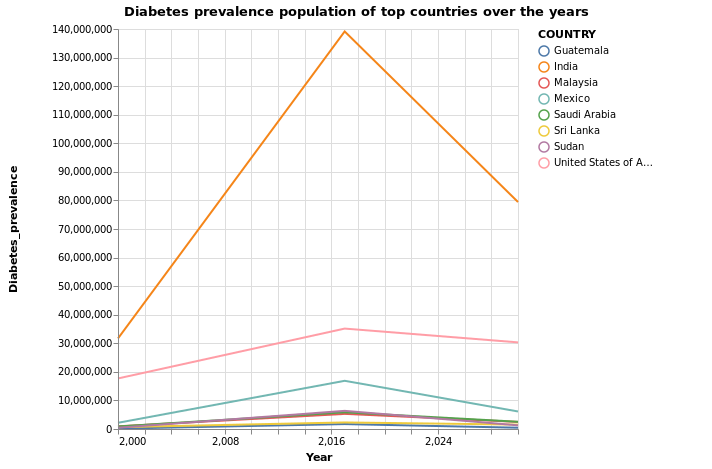

In [31]:
#Plotting Year on x axis, Diabetes prevalence on y axis and colour according to country
Top_Countries |>
  @vlplot(:line, x = :Year, y = :Diabetes_prevalence, color = "COUNTRY:n", # we give COUNTRY:n to define it as discrete
           width = 400, height = 400, title="Diabetes prevalence population of top countries over the years")
            #Specifying width and height of plot area along with title

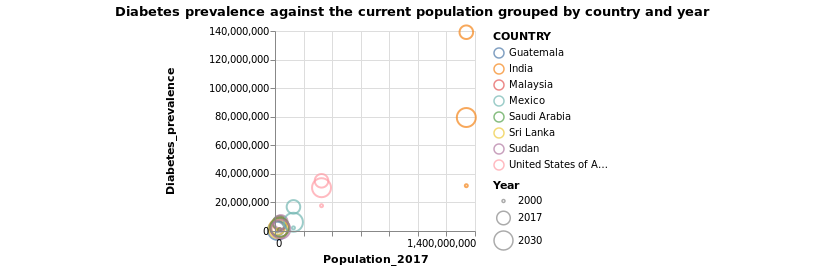

In [32]:
#Another plot!!
img= Top_Countries |> 
  @vlplot(:point, x = :Population_2017, y = :Diabetes_prevalence, color = "COUNTRY:n", size="Year:o",
    #For plotting a point plot with Population of 2017 on x axis, Diabetes prevalence population on y axis, colour based on country and size on the Year 
           width = 200, height = 200, title="Diabetes prevalence against the current population grouped by country and year")
